In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import datetime
import warnings
import math as ma
import datetime as dt
import seaborn as sns
import squarify 
warnings.filterwarnings("ignore")

## Data Exploration

In [2]:
xls = pd.ExcelFile("C:\Users\SOUBHIK MANDAL\Desktop\Intership\KPMG_Data_Insight.xlsx")
df = pd.read_excel(xls, "CustomerDemographic")
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_category,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,66.782574,70.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,39.585314,40.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.508601,70.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.801752,NaN,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.182574,50.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,44.944218,50.0,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,18.999012,20.0,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,NaN,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,46.735999,NaN,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [3]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'age_category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object')

In [4]:
df.rename(columns={"customer_id":"customer_id"}, inplace = True)
df.rename(columns={"first_name":"fname",
                   "last_name":"lname",
                   "gender":"gender",
                   "past_3_years_bike_related_purchases":"3y_bike_purchases",
                   "DOB":"DOB",
                   "age":"age"}, inplace = True)
df.rename(columns={"job_title":"JT",
                   "job_industry_category":"Category",
                   "wealth_segment":"wealth_segement",
                   "deceased_indicator":"D_Indicator",
                   "owns_car":"owns_car",
                   "tenure":"tenure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,age,age_category,JT,Category,wealth_segement,D_Indicator,owns_car,tenure
1,2,Eli,Bockman,Male,81,1980-12-16,39.585314,40.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.508601,70.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.801752,NaN,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.182574,50.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,53.845588,NaN,NaN,Retail,High Net Worth,N,Yes,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,44.944218,50.0,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,18.999012,20.0,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,NaN,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,46.735999,NaN,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [5]:
df.columns

Index(['customer_id', 'fname', 'lname', 'gender', '3y_bike_purchases', 'DOB',
       'age', 'age_category', 'JT', 'Category', 'wealth_segement',
       'D_Indicator', 'owns_car', 'tenure'],
      dtype='object')

In [6]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret
NaNlist = check_NA()
print(NaNlist, len(NaNlist))
check = []
k     = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(3, 13):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

[0, 0, 125, 0, 0, 87, 88, 587, 506, 656, 0, 0, 0, 87] 14


#### Understanding Purchase through customer demographics

[2038, 1873, 88]


([<matplotlib.axis.XTick at 0x1248cc0d088>,
 <a list of 6 Text xticklabel objects>)

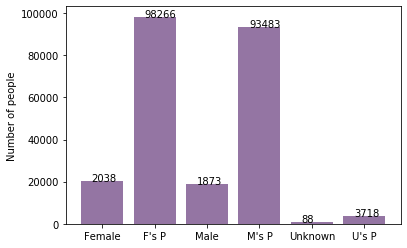

In [7]:
gender = [0,0,0]
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1
print(gender)
def gf(x, pos):
    return int(x)
bike = [0,0,0]
bike[0] += df['3y_bike_purchases'][df['gender'] == 'Female'].sum() + df['3y_bike_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['3y_bike_purchases'][df['gender'] == 'Male'].sum() + df['3y_bike_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['3y_bike_purchases'][df['gender'] == 'U'].sum()
grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x1248cf92c88>,
 <a list of 3 Text xticklabel objects>)

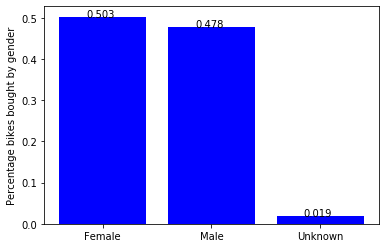

In [8]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 
x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = 'blue')
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)
plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [9]:
df1 = pd.read_excel(xls, "CustomerDemographicAnalysis1") #pivot table for age_category wise bike purchase
df1.rename(columns={"Row Labels":"age_category",
                   "Sum of past_3_years_bike_related_purchases":"Sum_3y_Bike_Purchase"}, inplace = True)
df1.drop([8], inplace = True)
df1

,age_category,Sum_3y_Bike_Purchase
0,20,2373
1,30,29296
2,40,32827
3,50,56608
4,60,28861
5,70,18729
6,80,65
7,90,123


Text(0, 0.5, 'Sum of bikes bought per age category')

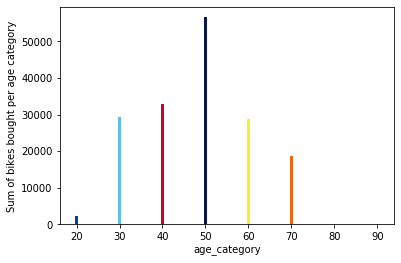

In [10]:
Age_Category_colors = ['#034694','#5CBFEB','#D00027','#091453',
               '#FBEE23','#EF6610','#C92520','#BA1F1A']
plt.bar(x=df1['age_category'],height=df1['Sum_3y_Bike_Purchase'], color = Age_Category_colors)
plt.xlabel('age_category')
plt.ylabel('Sum of bikes bought per age category')

In [11]:
df2 = pd.read_excel(xls, "CustomerDemographicAnalysis2") 
f2.rename(columns={"Sum of past_3_years_bike_related_purchases":"age_category"}, inplace = True)
df2.rename(columns={"Column Labels":"Affluent Customer",
                   "Unnamed: 2":"High Net Worth",
                   "Unnamed: 3":"Mass Customer",
                   "Unnamed: 4":"Grand Total"}, inplace = True)
df2=df2.iloc[1:]
df2.drop([9], inplace = True)
del df2['Grand Total']
df2['High Net Worth'] = df2['High Net Worth'].replace(np.nan, 0)
df2['Mass Customer'] = df2['Mass Customer'].replace(np.nan, 0)
df2

,age_category,Affluent Customer,High Net Worth,Mass Customer
1,20,373,765,1235
2,30,8163,6198,14935
3,40,8551,7379,16897
4,50,13548,14695,28365
5,60,6945,7325,14591
6,70,4055,5264,9410
7,80,38,27,0
8,90,67,0,56


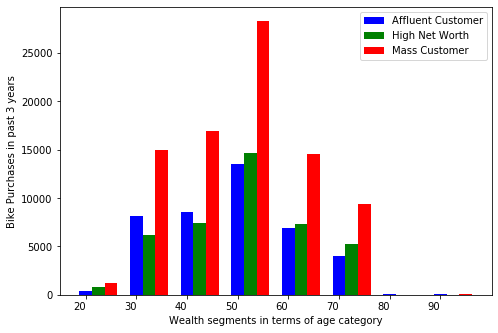

In [12]:
bars = ('20', '30', '40', '50', '60','70','80','90')
X = np.arange(len(bars))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, df2['Affluent Customer'], color = 'b', width = 0.25, label = 'Affluent Customer')
ax.bar(X + 0.25, df2['High Net Worth'], color = 'g', width = 0.25, label = 'High Net Worth')
ax.bar(X + 0.50, df2['Mass Customer'], color = 'r', width = 0.25, label = 'Mass Customer')
plt.xlabel('Wealth segments in terms of age category')
plt.ylabel('Bike Purchases in past 3 years')
plt.xticks(X, bars, color='black', horizontalalignment='right')
plt.legend()
plt.tight_layout()
plt.show()

#### Analyzing Different Product Demands in Customers

In [13]:
df3 = pd.read_excel(xls, "ProductBrandforCustomers") 
df3.rename(columns={"Count of past_3_years_bike_related_purchases":"age_category"}, inplace = True)
df3.rename(columns={"Column Labels":"Giant Bicycles",
                   "Unnamed: 2":"Norco Bicycles",
                   "Unnamed: 3":"OHM Cycles",
                   "Unnamed: 4":"Solex",
                   "Unnamed: 5":"Trek Bicycles"}, inplace = True)
df3.rename(columns={"Unnamed: 6":"WeareA2B",
                   "Unnamed: 7":"Grand Total"},inplace = True)
df3=df3.iloc[1:]
df3.drop([7], inplace = True)
del df3['Grand Total']
df3

,age_category,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
1,20,3,1,2,1,1,5
2,30,18,21,25,26,15,17
3,40,20,16,17,29,13,32
4,50,39,47,47,54,29,43
5,60,17,17,17,23,18,26
6,70,21,9,13,13,20,11


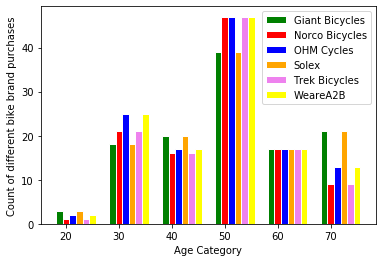

In [14]:
barWidth = 0.125
bars1 = df3['Giant Bicycles']
bars2 = df3['Norco Bicycles']
bars3 = df3['OHM Cycles']
bars4 = df3['Solex']
bars5 = df3['Trek Bicycles']
bars6 = df3['WeareA2B']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Giant Bicycles')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='Norco Bicycles')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='OHM Cycles')
plt.bar(r4, bars1, color='orange', width=barWidth, edgecolor='white', label='Solex')
plt.bar(r5, bars2, color='violet', width=barWidth, edgecolor='white', label='Trek Bicycles')
plt.bar(r6, bars3, color='yellow', width=barWidth, edgecolor='white', label='WeareA2B')
plt.ylabel('Count of different bike brand purchases')
plt.xlabel('Age Category')
plt.xticks([r + barWidth for r in range(len(bars1))], ['20', '30', '40', '50', '60','70'])
plt.legend()
plt.show()

In [15]:
df4 = pd.read_excel(xls, "Customer-ProductLine") 
df4.rename(columns={"Count of past_3_years_bike_related_purchases":"age_category"}, inplace = True)
df4.rename(columns={"Column Labels":"Mountain",
                   "Unnamed: 2":"Road",
                   "Unnamed: 3":"Standard",
                   "Unnamed: 4":"Touring"}, inplace = True)
df4.rename(columns={"Unnamed: 5":"Grand Total"},inplace = True)
df4=df4.iloc[1:]
df4.drop([7], inplace = True)
del df4['Grand Total
df4['Mountain'] = df4['Mountain'].replace(np.nan, 0)
df4['Touring'] = df4['Touring'].replace(np.nan, 0)
df4

,age_category,Mountain,Road,Standard,Touring
1,20,0,4,9,0
2,30,2,26,84,10
3,40,0,25,90,12
4,50,5,57,177,20
5,60,3,26,80,9
6,70,2,18,65,2


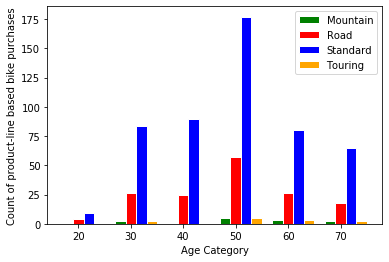

In [16]:
barWidth = 0.2
bars1 = df4['Mountain']
bars2 = df4['Road']
bars3 = df4['Standard']
bars4 = df4['Touring']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Mountain')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='Road')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Standard')
plt.bar(r4, bars1, color='orange', width=barWidth, edgecolor='white', label='Touring')
plt.ylabel('Count of product-line based bike purchases')
plt.xlabel('Age Category')
plt.xticks([r + barWidth for r in range(len(bars1))], ['20', '30', '40', '50', '60','70'])
plt.legend()
plt.show()

In [17]:
df5 = pd.read_excel(xls, "WealthSegment-ProductLine") 
df5.rename(columns={"Count of past_3_years_bike_related_purchases":"product-line"}, inplace = True)
df5.rename(columns={"Column Labels":"Affluent Customer",
                   "Unnamed: 2":"High Net Worth",
                   "Unnamed: 3":"Mass Customer",
                   "Unnamed: 4":"Grand Total"}, inplace = True)
df5=df5.iloc[1:]
df5.drop([5], inplace = True)
del df5['Grand Total']
df5

,product-line,Affluent Customer,High Net Worth,Mass Customer
1,Mountain,1,6,6
2,Road,36,49,95
3,Standard,154,137,307
4,Touring,17,15,29


Text(0.5, 0, 'product-line')

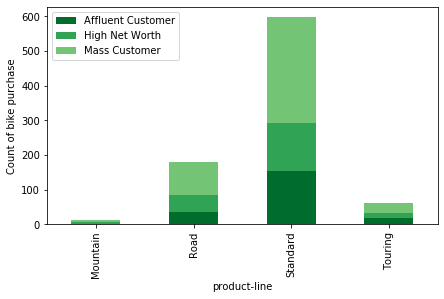

In [18]:
N = 4
labels = ['Mountain', 'Road', 'Standard', 'Touring']
ind = np.arange(N) 
colors = ["#006D2C", "#31A354","#74C476"]
df5.loc[:,['Affluent Customer','High Net Worth', 'Mass Customer']].plot.bar(stacked=True, color=colors, figsize=(7,4))
plt.xticks(ind, labels)
plt.ylabel('Count of bike purchase')
plt.xlabel('product-line')

####RFM stands for Recency, Frequency and Monetary values and is used for finding out the customers for the business.

In [19]:
rfm_data = pd.read_excel(xls, "RFM_Data") 
rfm_data.rename(columns={"Row Labels":"Customer_ID",
                   "Min of recency":"Recency",
                   "Count of product_id":"Frequency",
                   "Sum of Profit":"Monetary-Value"}, inplace = True)
rfm_data.drop([3494], inplace = True)
rfm_data = rfm_data[rfm_data['Recency'].notna()]
rfm_data = rfm_data[rfm_data['Frequency'].notna()]
rfm_data = rfm_data[rfm_data['Monetary-Value'].notna()]
rfm_data

,Customer_ID,Recency,Frequency,Monetary-Value
74,75,180.0,8,1398.87
101,102,109.0,7,1119.98
210,211,213.0,9,1096.25
322,323,280.0,6,1324.54
351,352,31.0,6,1320.37
...,...,...,...,...
3479,3487,10.0,3,1366.15
3481,3489,267.0,6,592.66
3482,3490,181.0,5,2159.41
3485,3493,93.0,6,2673.06


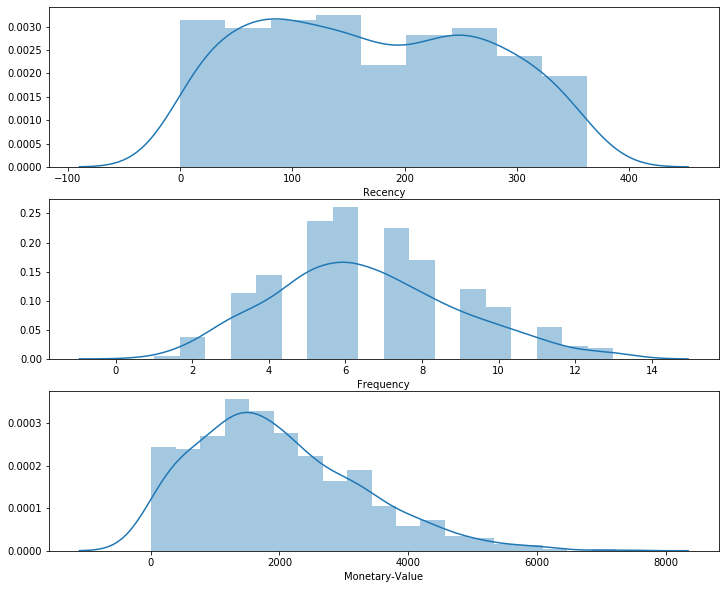

In [20]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(rfm_data['Recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm_data['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm_data['Monetary-Value'])
plt.show()

In [21]:
r_labels = range(4, 0, -1); f_labels = range(1, 5)
r_scores = pd.qcut(rfm_data['Recency'], q=4, labels=r_labels)
f_scores = pd.qcut(rfm_data['Frequency'], q=4, labels=f_labels)
rfm_data = rfm_data.assign(R = r_scores.values, F = f_scores.values)
rfm_data

,Customer_ID,Recency,Frequency,Monetary-Value,R,F
74,75,180.0,8,1398.87,2,3
101,102,109.0,7,1119.98,3,3
210,211,213.0,9,1096.25,2,4
322,323,280.0,6,1324.54,1,2
351,352,31.0,6,1320.37,4,2
...,...,...,...,...,...,...
3479,3487,10.0,3,1366.15,4,1
3481,3489,267.0,6,592.66,1,2
3482,3490,181.0,5,2159.41,2,1
3485,3493,93.0,6,2673.06,3,2


In [22]:
m_labels = range(1, 5)
m_scores = pd.qcut(rfm_data['Monetary-Value'], q=4, labels=m_labels)
rfm_data = rfm_data.assign(M = m_scores.values)
rfm_data

,Customer_ID,Recency,Frequency,Monetary-Value,R,F,M
74,75,180.0,8,1398.87,2,3,2
101,102,109.0,7,1119.98,3,3,2
210,211,213.0,9,1096.25,2,4,2
322,323,280.0,6,1324.54,1,2,2
351,352,31.0,6,1320.37,4,2,2
...,...,...,...,...,...,...,...
3479,3487,10.0,3,1366.15,4,1,2
3481,3489,267.0,6,592.66,1,2,1
3482,3490,181.0,5,2159.41,2,1,3
3485,3493,93.0,6,2673.06,3,2,3


In [23]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm_data['RFM_Segment_Concat'] = rfm_data.apply(join_rfm, axis=1)
rfm = rfm_data
rfm.head()

,Customer_ID,Recency,Frequency,Monetary-Value,R,F,M,RFM_Segment_Concat
74,75,180.0,8,1398.87,2,3,2,232
101,102,109.0,7,1119.98,3,3,2,332
210,211,213.0,9,1096.25,2,4,2,242
322,323,280.0,6,1324.54,1,2,2,122
351,352,31.0,6,1320.37,4,2,2,422


In [24]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

74     7.0
101    8.0
210    8.0
322    5.0
351    8.0
Name: RFM_Score, dtype: float64


In [25]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm

,Customer_ID,Recency,Frequency,Monetary-Value,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
74,75,180.0,8,1398.87,2,3,2,232,7.0,Loyal
101,102,109.0,7,1119.98,3,3,2,332,8.0,Champions
210,211,213.0,9,1096.25,2,4,2,242,8.0,Champions
322,323,280.0,6,1324.54,1,2,2,122,5.0,Promising
351,352,31.0,6,1320.37,4,2,2,422,8.0,Champions
...,...,...,...,...,...,...,...,...,...,...
3479,3487,10.0,3,1366.15,4,1,2,412,7.0,Loyal
3481,3489,267.0,6,592.66,1,2,1,121,4.0,Needs Attention
3482,3490,181.0,5,2159.41,2,1,3,213,6.0,Potential
3485,3493,93.0,6,2673.06,3,2,3,323,8.0,Champions


In [26]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary-Value': ['mean', 'count']
}).round(1)
print(rfm_level_agg)

                   Recency Frequency Monetary-Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them     115.7       8.7         3029.9   204
Champions            160.1       7.1         2113.1    82
Loyal                169.3       6.1         1854.2   101
Needs Attention      257.4       4.4          915.3    49
Potential            167.8       5.0         1290.8    87
Promising            218.7       4.8         1071.9    77
Require Activation   318.0       3.6          468.3    25


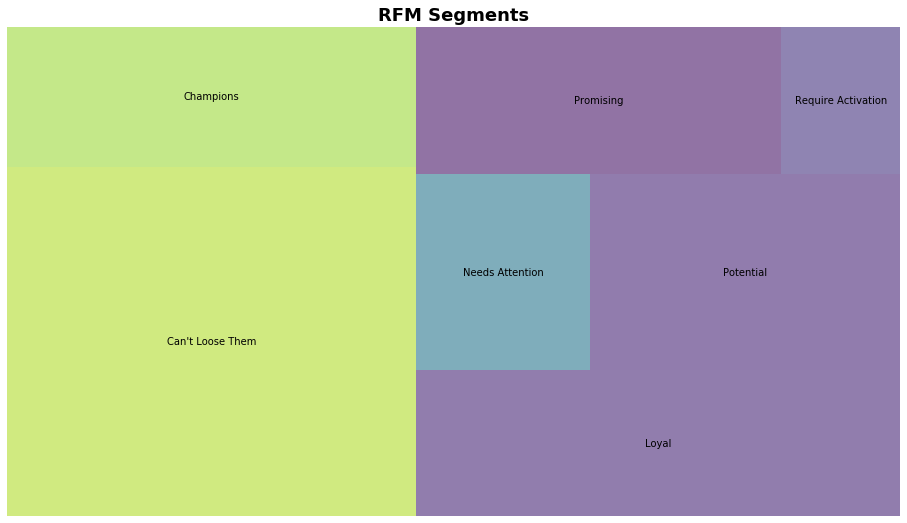

In [27]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()